### Confidence Interval - Difference In Means

Here you will look through the example from the last video, but you will also go a couple of steps further into what might actually be going on with this data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

`1.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers.  Build a 99% confidence interval using your sampling distribution.  Use your interval to start answering the first quiz question below.

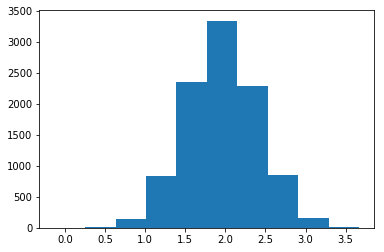

In [2]:
diff = []

for _ in range(10000):
    
    bootstrap = full_data.sample(200, replace=True)
    coff = bootstrap[bootstrap['drinks_coffee']==True].height.mean()
    non_coff = bootstrap[bootstrap['drinks_coffee']==False].height.mean()
    diff.append(coff - non_coff)
    
plt.hist(diff);

In [3]:
np.percentile(diff, 0.5), np.percentile(diff, 99.5)

(0.7804195541448713, 3.1064330970321481)

`2.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21.  Build a 99% confidence interval using your sampling distribution.  Use your interval to finish answering the first quiz question below.  

In [4]:
full_data.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


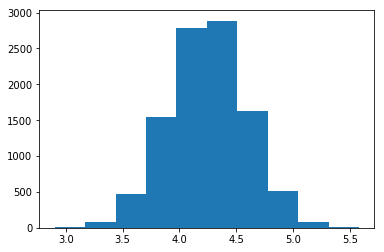

In [5]:
diff_21 = []

for _ in range(10000):
    sample = sample_data.sample(200, replace=True)
    big = sample[sample['age']=='>=21'].height.mean()
    small = sample[sample['age']=='<21'].height.mean()
    diff_21.append(big - small)
    
plt.hist(diff_21);

In [6]:
np.percentile(diff_21, 0.5), np.percentile(diff_21, 99.5)

(3.3475051139749197, 5.1167261370900183)

`3.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **under** 21 years old.  Using your sampling distribution, build a 95% confidence interval.  Use your interval to start answering question 2 below.

In [16]:
diffs_coff_under21 = []
for _ in range(10000):
    bootsamp = sample_data.sample(200, replace = True)
    under21_coff_mean = bootsamp.query("age == '<21' and drinks_coffee == True")['height'].mean()
    under21_nocoff_mean = bootsamp.query("age == '<21' and drinks_coffee == False")['height'].mean()
    diffs_coff_under21.append(under21_nocoff_mean - under21_coff_mean)
    
np.percentile(diffs_coff_under21, 2.5), np.percentile(diffs_coff_under21, 97.5)
# For the under21 group, we have evidence that the non-coffee drinkers are on average taller

(1.0797673365116816, 2.624185393057247)

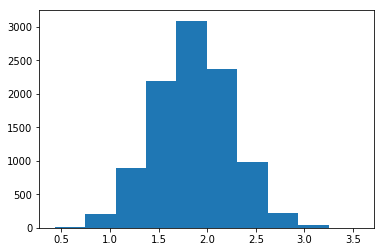

In [17]:
plt.hist(diffs_coff_under21);

`4.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **over** 21 years old.  Using your sampling distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question below. As well as the following questions. 

In [15]:
diffs_coff_over21 = []
for _ in range(10000):
    bootsamp = sample_data.sample(200, replace = True)
    over21_coff_mean = bootsamp.query("age != '<21' and drinks_coffee == True")['height'].mean()
    over21_nocoff_mean = bootsamp.query("age != '<21' and drinks_coffee == False")['height'].mean()
    diffs_coff_over21.append(over21_nocoff_mean - over21_coff_mean)
    
np.percentile(diffs_coff_over21, 2.5), np.percentile(diffs_coff_over21, 97.5)
# For the under21 group, we have evidence that the non-coffee drinkers are on average taller

(1.8040663130118768, 4.4148277953003827)

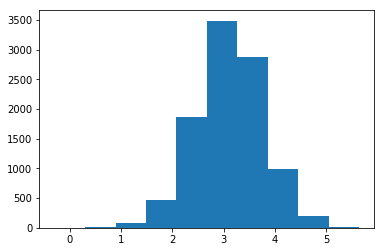

In [18]:
plt.hist(diffs_coff_over21);